<font size=4 color='blue'>

# <center> Clase 7_1, marzo 15 del 2023. </center>

<font size=6 color='blue'>
    
Métodos de aprendizaje basados en árboles de decisión


<font size=3 color='black'>
Esto es el inicio de lo que se vera en los temas que concien al algoritmo arboles de decision desarrollado por Leo Breiman, de aqui se fue desarrollamdo más y mas las subvariantes del algoritmo, siento ahora utilizadas en diferentes tipo de plataformas, como se verá, estos algoritmos son muy utilizados en la industria por su baja cantidad de muestras necesarias. 

<font size=3 color='black'>
El primer algoritmo como decimos es el que desarrollo Leo Breiman, el cual consiste en dado un vector de caracteristicas X y una variable objetivo Y, se emplea el algoritmo de recursiva para poder particionar el espacio de caracteristicas de tal manera que elementos con variable objetivo similares se agrupen juntos. 

Sea $m$ un nodo del árbol, $Q_{m}$ un subconjunto con $n$ muestras de nuestro conjunto de entrenamiento. Para cada bifurcación de rama $\Theta = (j, t_{m}) $ se necesitan dos elementos, $j$ que es un rasgo de nuestros datos y $t_{m}$ que es un umbral, separando así los datos en dos conjuntos, que por conveniencia llamaremos $Q_{iz}$ y $Q_{der}$, donde $Q_{iz} = \left\lbrace (x,y) |xj < t_{m} \right\rbrace$ y $Q_{der} = Q_{m} - Q_{iz}$. Al final lo que se hace es ver si la elección de esa bifurcación es buena, lo cual se hace utilizando una función de pérdida $H$ y una función a minimizar $G$. 

<font size=3 color='black'>
$ G(Q_{m}, \Theta) = \frac{n_{m}^{left}}{n_{m}}H(Q_{m}^{left}(\Theta)) + \frac{n_{m}^{right}}{n_{m}}H(Q_{m}^{right}(\Theta))$ Nos quedamos con la bifurcación que minimice G, $ \Theta^{*} = argmin_{\Theta}G(Q_{m}, \Theta) $ se rehace el proceso para cada uno de los subconjuntos $ Q_{iz} $ y $ Q_{der} $ para la $ \Theta^{*} $ hasta que la cardinalidad de esos subconjuntos sea lo más cercano a 1. 

<font size=6 color='red'>
<center>Aprendizaje supervisado. Dos ejemplos de clasificación

<font size=5 color='black'>
Primer ejemplo:
<font size=5 color='blue'>
$$$$Sistema de estudio: Clasificación de tres tipos de plantas de iris


<font size=5 color='magenta'>
<center>En busca de las variables X y Y que definen al sistema

<font size=4 color='black'>
El "Framework" sk-learn, además de bibliotecas, contiene datos, en especial los relacionados con las plantas de iris y con los dígitos escritos a mano

In [1]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.tree import export_text
from sklearn.metrics import accuracy_score

<font size=4 color='black'>
Se cargan los datos

In [2]:
iris = load_iris()
print(iris.data.shape)

(150, 4)


<font size=4 color='black'>
Se extraen las variables X y Y de las muestras. 

In [3]:
X, Y = iris.data, iris.target 

<font size=4 color='black'>
Las muestras se ordenan al azar, y de ellas el 10 % se destina como prueba.

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.1, random_state=9)

In [5]:
print(X_train.shape)
print(X_test.shape)

(135, 4)
(15, 4)


<font size=4 color='black'>
La variable Y (target) contiene 3 clases (diferentes tipos de planta de iris)

In [6]:
print(iris['target_names']) 

['setosa' 'versicolor' 'virginica']


In [7]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

<font size=5 color='blue'>
Entrenamiento del sistema de aprendizaje basado en árboles de decisión

<font size=5 color='blue'>
Definición del algoritmo de aprendizaje

In [8]:
DT = tree.DecisionTreeClassifier()

<font size=5 color='blue'>
Entrenamiento

In [9]:
DT = DT.fit(X_train, Y_train) 

<font size=5 color='blue'>
Diagrama del arbol de decisión entrenado

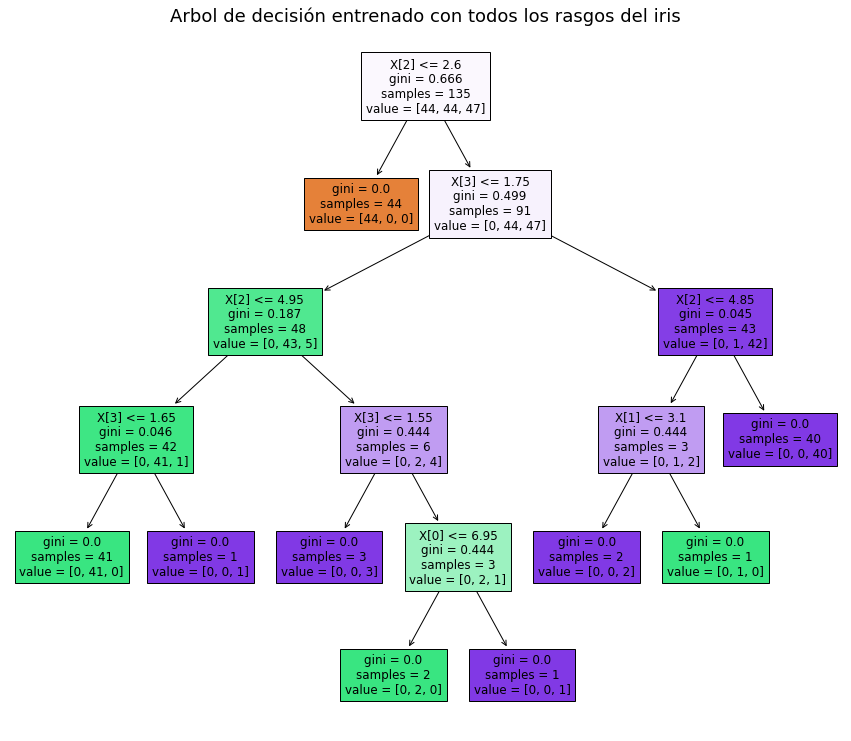

In [10]:
plt.figure(figsize=(15,13))

plot_tree(DT, filled=True)
plt.title("Arbol de decisión entrenado con todos los rasgos del iris", size=18)
plt.show()

In [11]:
r = export_text(DT, feature_names=iris['feature_names'])
print(r)
#Lo que estamos viendo es que de izquierda a derecha hay 6 niveles, como lo indica la figura anterior, 
#entonces se tiene que leer de la forma que en cada nivel se pide una condicion, en el primer nivel
#es que Petal length <= 2.45 si se cumlpe, es clase 0 #si 2.45 < petal length hay mas condiciones,
#en el segundo nivel se hacen mas comparaciones y asi sucesivamente. 

|--- petal length (cm) <= 2.60
|   |--- class: 0
|--- petal length (cm) >  2.60
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



<font size=5 color='blue'>
Inferencia (predicción)

<font size=4 color='black'>
Se emplean las muestras X_test y Y_test

In [12]:
Y_predictedDT = DT.predict(X_test) 

In [13]:
for i in range(len(X_test)):
    print(Y_test[i], Y_predictedDT[i]) #Mostramos el valor que se pudo clasificar con el valor que le corresponde, con estos datos
#nos damos cuenta que hay un accuracy de el 100%

2 2
1 1
2 2
2 2
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 1
1 1
1 1
0 0


<font size=5 color='blue'>
Precisión (Accuracy)

In [14]:
accuracy =accuracy_score(Y_test, Y_predictedDT)*100.0
print("Se tiene una precisión del {0:.2f} %".format(accuracy))

Se tiene una precisión del 100.00 %


<font size=4 color='black'>
Se tiene una precisión del 100 %

<font size=6 color='blue'>
    
Métodos de aprendizaje basados en árboles de decisión


<font size=5 color='black'>
Segundo ejemplo:
<font size=5 color='blue'>
$$$$Sistema de estudio: Clasificación de dígitos escritos a mano


<font size=5 color='magenta'>
<center>En busca de las variables X y Y que definen al sistema

<font size=4 color='black'>
Se cargan los datos

In [15]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<font size=4 color='black'>
Se extraen las variables X y Y de las muestras. 

In [16]:
X2, Y2 = digits.data, digits.target

<font size=4 color='black'>
Las muestras se ordenan al azar, y de ellas el 10 % se destina como prueba.

In [17]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split( X2, Y2, test_size=0.1, random_state=9)

In [18]:
print(X_train2.shape)
print(X_test2.shape)

(1617, 64)
(180, 64)


<font size=4 color='black'>
Se despliega una muestra 

<Figure size 432x288 with 0 Axes>

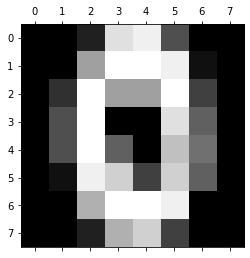

In [19]:

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[55])
plt.show()

In [20]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<font size=5 color='blue'>
Entrenamiento del sistema de aprendizaje basado en árboles de decisión

<font size=5 color='blue'>
Definición del algoritmo de aprendizaje

In [21]:
DT2 = tree.DecisionTreeClassifier()

<font size=5 color='blue'>
Entrenamiento

In [22]:
DT2 = DT2.fit(X_train2, Y_train2) 

<font size=5 color='blue'>
Diagrama del arbol de decisión entrenado

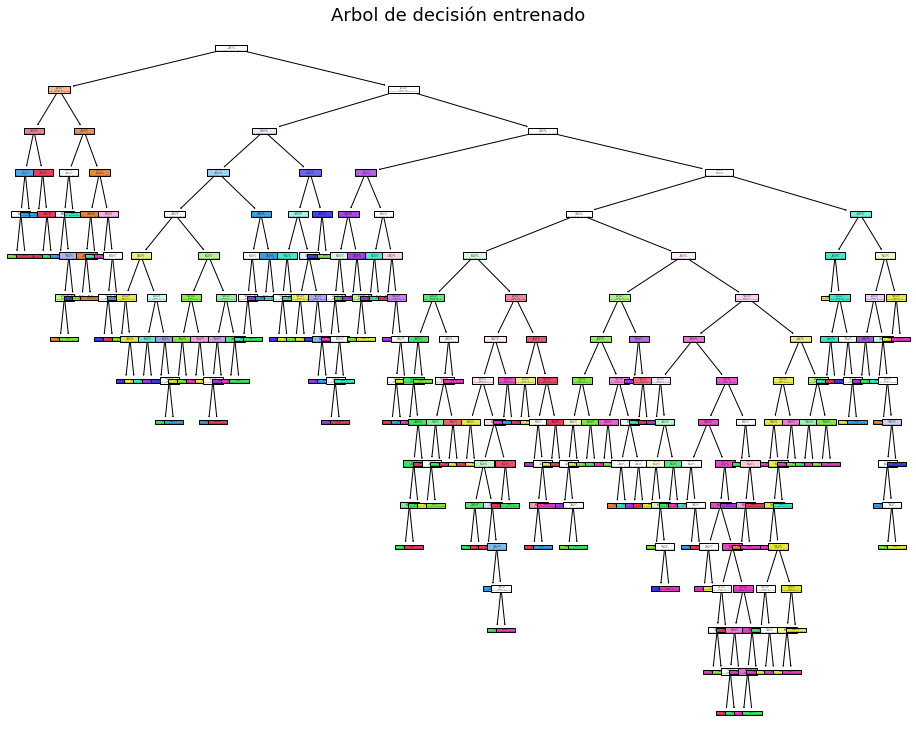

In [23]:
plt.figure(figsize=(16,13))

plot_tree(DT2, filled=True)
plt.title("Arbol de decisión entrenado", size=18)
plt.show()

In [24]:
r = export_text(DT2, feature_names=digits['feature_names'])
print(r)

|--- pixel_4_4 <= 0.50
|   |--- pixel_5_2 <= 5.00
|   |   |--- pixel_2_5 <= 6.50
|   |   |   |--- pixel_3_2 <= 6.00
|   |   |   |   |--- pixel_3_3 <= 11.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- pixel_3_3 >  11.50
|   |   |   |   |   |--- class: 9
|   |   |   |--- pixel_3_2 >  6.00
|   |   |   |   |--- class: 5
|   |   |--- pixel_2_5 >  6.50
|   |   |   |--- pixel_1_5 <= 1.50
|   |   |   |   |--- class: 5
|   |   |   |--- pixel_1_5 >  1.50
|   |   |   |   |--- pixel_1_1 <= 10.50
|   |   |   |   |   |--- class: 9
|   |   |   |   |--- pixel_1_1 >  10.50
|   |   |   |   |   |--- class: 3
|   |--- pixel_5_2 >  5.00
|   |   |--- pixel_2_5 <= 0.50
|   |   |   |--- pixel_4_5 <= 9.00
|   |   |   |   |--- pixel_6_5 <= 3.50
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- pixel_6_5 >  3.50
|   |   |   |   |   |--- pixel_5_3 <= 11.00
|   |   |   |   |   |   |--- pixel_6_2 <= 15.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- pixel_6_2 >  15.50
|   |

<font size=5 color='blue'>
Inferencia (predicción)

In [25]:
Y_predictedDT2 = DT2.predict(X_test2) #Hacemos la inferencia con el conjunto de test

In [26]:
for i in range(10):
    print(Y_test2[i], Y_predictedDT2[i]) 

1 1
1 1
7 7
2 2
4 4
0 0
1 1
8 8
8 8
3 3


<font size=5 color='blue'>
Precisión (Accuracy)

In [27]:
accuracy =accuracy_score(Y_test2, Y_predictedDT2)*100.0
print("Se tiene una precisión del {0:.2f} %".format(accuracy))

Se tiene una precisión del 87.78 %
